# Sales Channel Prediction


When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The company has to select proper sales channel to predict the right sales channel to generate good revenue. 

# Topics

* Types of supervised learning
 
* Reading data using pandas

* Visualizing data using seaborn

* Linear regression pros and cons

* Form of linear regression

* Preparing X and y using pandas

* Splitting X and y into training and testing sets

* Linear regression in scikit-learn

* Interpreting model coefficients

* Making predictions

* Model evaluation metrics for regression

* Computing the RMSE for our Sales predictions

* Feature selection

* Decision Tree (to find out the result better way)

* Resources (Ritchie Ng best way to learn concepts)

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('Advertising.csv',sep=',',na_values=".")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
# first five row

df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.isnull()

,Unnamed: 0,TV,radio,newspaper,sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

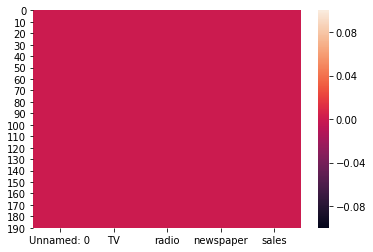

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [11]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [12]:
# Univariate Analysis

df['sales'].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

In [13]:
df.sales.value_counts().sort_index()

1.6     1
3.2     1
4.8     1
5.3     2
5.5     1
       ..
24.7    1
25.4    3
25.5    1
26.2    1
27.0    1
Name: sales, Length: 121, dtype: int64

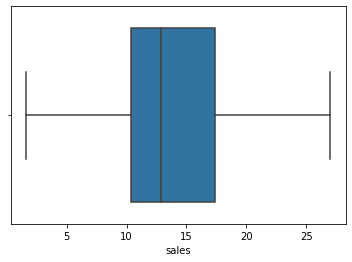

In [14]:
sns.boxplot(x='sales',data=df)

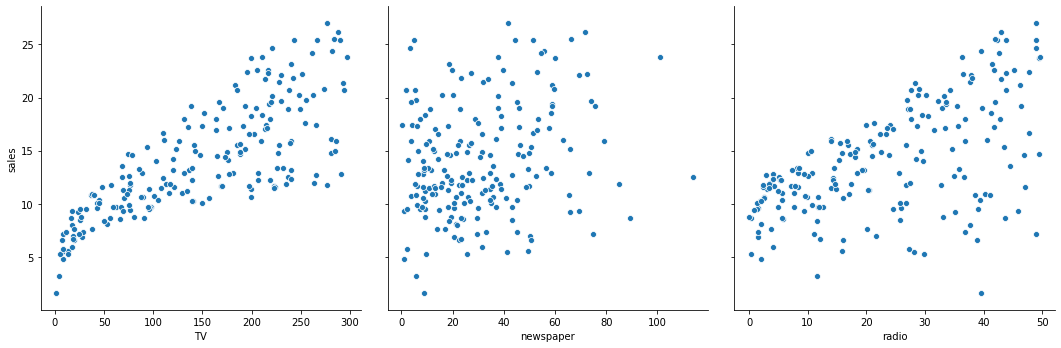

In [15]:
sns.pairplot(df,x_vars=['TV','newspaper','radio'],y_vars='sales',height=5,aspect=1,kind='scatter')
plt.show()

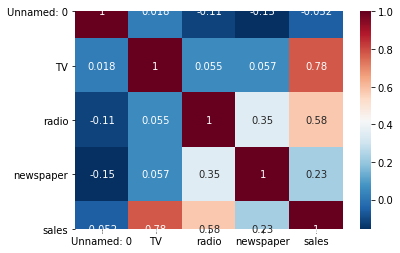

In [16]:
# checking correlation in heatmap

corr=df.corr()

#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr,cmap='RdBu_r',annot=True,)

#show plot
plt.show()

In [17]:
corr['sales'].sort_values(ascending=False)

sales         1.000000
TV            0.782224
radio         0.576223
newspaper     0.228299
Unnamed: 0   -0.051616
Name: sales, dtype: float64

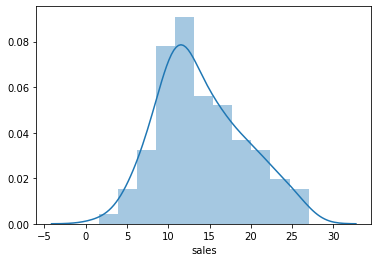

In [18]:
sns.distplot(df['sales'])

<function matplotlib.pyplot.show(*args, **kw)>

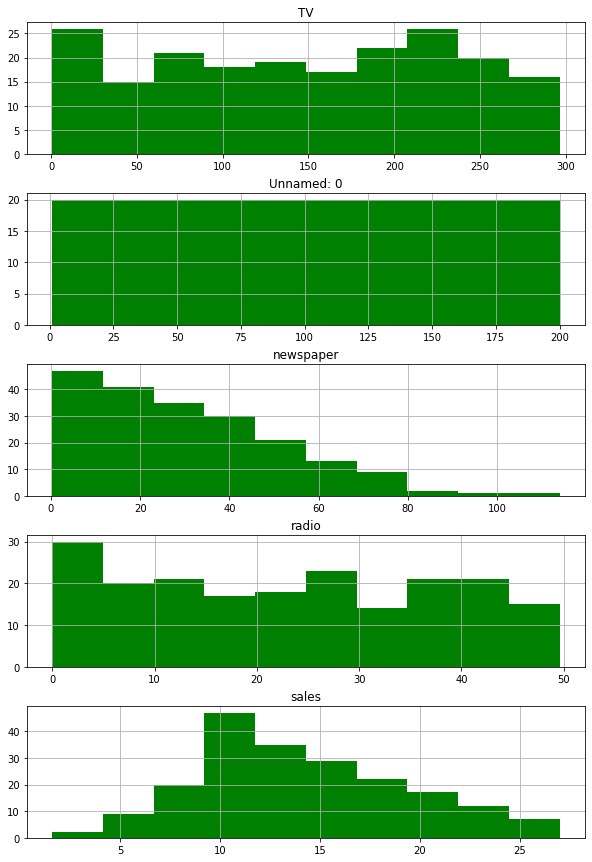

In [19]:
df.hist(figsize=(10,15),layout=(5,1),color='green')
plt.show

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000D90556EF88>],
      dtype=object)

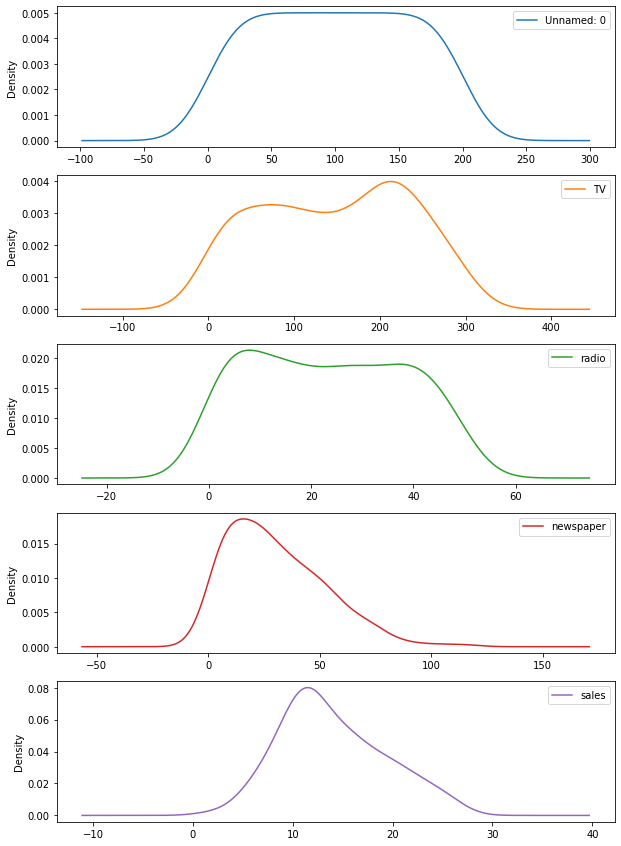

In [20]:
# Density visualisation for all attributes

df.plot(kind='density',figsize=(10,15),layout=(5,1),sharex=False,subplots=True)

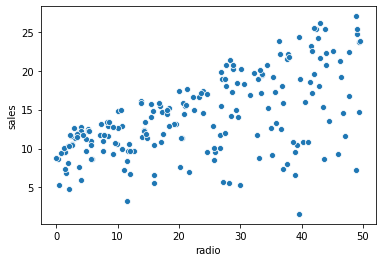

In [21]:
# Bivariate analysis

# radio and sales comparing

sns.scatterplot(x='radio',y='sales',data=df)

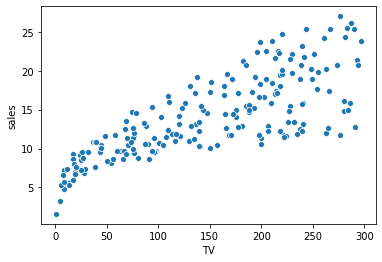

In [22]:
# TV andsales comparing

sns.scatterplot(x='TV',y='sales',data=df)

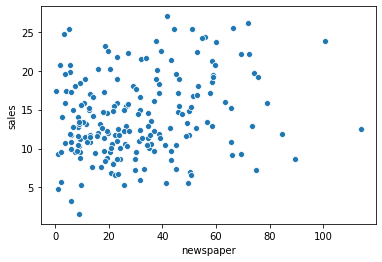

In [23]:
# newspaper and sales comparing

sns.scatterplot(x='newspaper',y='sales',data=df)

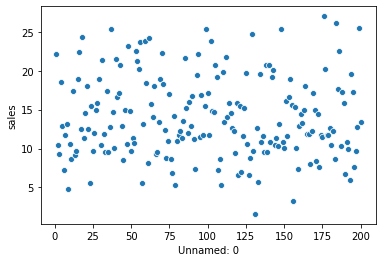

In [24]:
# unnamed (others) and sales comparing

sns.scatterplot(x='Unnamed: 0',y='sales',data=df)

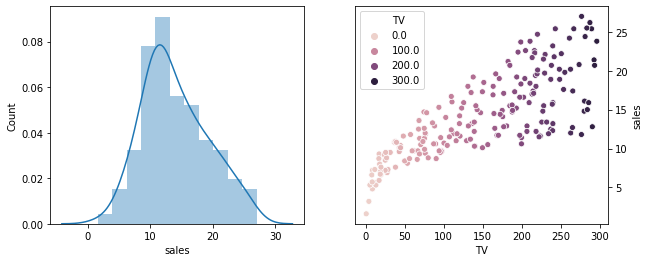

In [25]:
# two plots in parler way

p, fig=plt.subplots(1,2,figsize=(10,4))

sns.distplot(df['sales'],ax=fig[0])
fig[0].set_xlabel('sales',fontsize=10)
fig[0].set_ylabel('Count',fontsize=10)
fig[0].yaxis.tick_left()

sns.scatterplot(x ='TV',y='sales',data=df,hue='TV',ax=fig[1])
fig[1].set_xlabel('TV',fontsize=10)
fig[1].set_ylabel('sales',fontsize=10)
fig[1].yaxis.set_label_position("right")
fig[1].yaxis.tick_right()

plt.show()

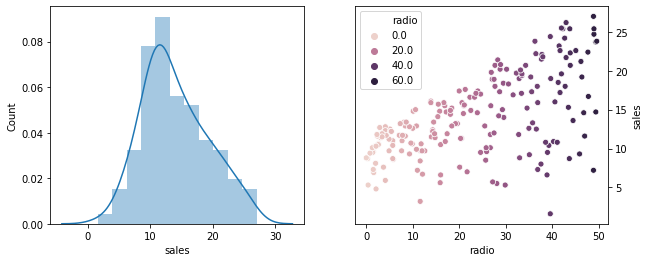

In [26]:
# two plots in parler way

p, fig=plt.subplots(1,2,figsize=(10,4))

sns.distplot(df['sales'],ax=fig[0])
fig[0].set_xlabel('sales',fontsize=10)
fig[0].set_ylabel('Count',fontsize=10)
fig[0].yaxis.tick_left()

sns.scatterplot(x ='radio',y='sales',data=df,hue='radio',ax=fig[1])
fig[1].set_xlabel('radio',fontsize=10)
fig[1].set_ylabel('sales',fontsize=10)
fig[1].yaxis.set_label_position("right")
fig[1].yaxis.tick_right()

plt.show()

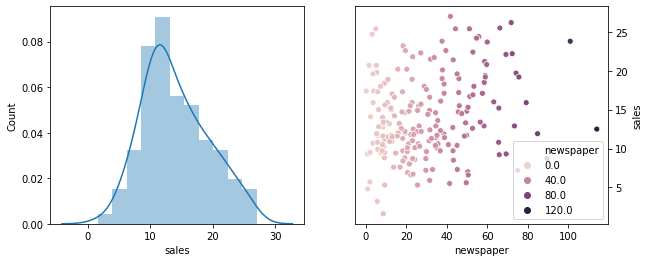

In [27]:
# two plots in parler way

p, fig=plt.subplots(1,2,figsize=(10,4))

sns.distplot(df['sales'],ax=fig[0])
fig[0].set_xlabel('sales',fontsize=10)
fig[0].set_ylabel('Count',fontsize=10)
fig[0].yaxis.tick_left()

sns.scatterplot(x ='newspaper',y='sales',data=df,hue='newspaper',ax=fig[1])
fig[1].set_xlabel('newspaper',fontsize=10)
fig[1].set_ylabel('sales',fontsize=10)
fig[1].yaxis.set_label_position("right")
fig[1].yaxis.tick_right()

plt.show()

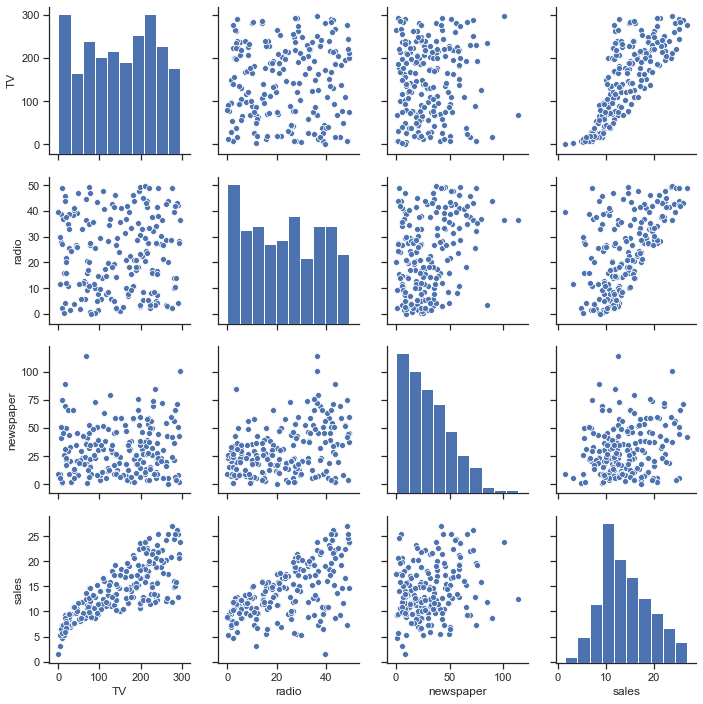

In [28]:
#Plot pairwise relationships in few data features  (plot size constraint)


plot_pair=['TV','radio','newspaper','sales']
sns.set(style="ticks",color_codes=True)
sns.pairplot(df[plot_pair])

Above Data Analysis we see sales measurement with graph, with TV, Redio, Newspaper, Others we compare with sales.

Linear regression

* Strong relationship between TV ads and sales
* Weak relationship between Radio ads and sales
* Very weak to no relationship between Newspaper ads and sales
* This Analysis can help in predicting sales using different Alogrithms

# Linear regression Pros and Cons

Pros:

Fast
No tuning required
Highly interpretable
Well-understood

Cons:

Unlikely to produce the best predictive accuracy
Presumes a linear relationship between the features and response
If the relationship is highly non-linear as with many scenarios, linear relationship will not effectively model the relationship and its prediction would not be accurate


# Form of linear regression

y=β0+β1x1+β2x2+...+βnxn 

y  is the response
β0  is the intercept
β1  is the coefficient for  x1  (the first feature)
βn  is the coefficient for  xn  (the nth feature)
In this case:

y=β0+β1×TV+β2×Radio+β3×Newspaper 
The  β  values are called the model coefficients

These values are "learned" during the model fitting step using the "least squares" criterion
Then, the fitted model can be used to make predictions

In [29]:
# importing liabraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [30]:

# Preparing X and y using pandas
# scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays
# However, pandas is built on top of NumPy
# Thus, X can be a pandas DataFrame (matrix) and y can be a pandas Series (vector)

# creating a python list of features name

features=['TV','radio','newspaper']
target=['sales']

x=df[features]
y=df[target]

In [31]:
x[:5]

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [32]:
# check the type and shape of X
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [33]:
y[:5]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [34]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [35]:
# Dividing x & y data in to train and test dataset in the ratio of 75:25 ratio using sklear train test split function

# default split is 75% for training and 25% for testing

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150, 1)
(50, 1)


In [37]:
# fit on training set

Lin=LinearRegression()
Lin.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# Interpreting model coefficients

print(Lin.intercept_)
print(Lin.coef_)

[2.87696662]
[[0.04656457 0.17915812 0.00345046]]


In [39]:
# pair the feature names with the coefficients
# hard to remember the order, we so we python's zip function to pair the feature names with the coefficients

zip(features,Lin.coef_)

y=2.88 + 0.0466×TV + 0.179×Radio + 0.00345×Newspaper
 
How do we interpret the TV coefficient (0.0466)?

For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.
Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.
Important notes:

This is a statement of association, not causation
If an increase in TV ad spending was associated with a decrease in sales, β1 would be negative.

In [40]:
# Making Prediction on test data

y_predict=Lin.predict(x_test)

# cross check with predict data and test data
print(y_predict[:5])
print('-'*20)
print(y_test[:5])

[[21.70910292]
 [16.41055243]
 [ 7.60955058]
 [17.80769552]
 [18.6146359 ]]
--------------------
     sales
58    23.8
40    16.6
34     9.5
102   14.8
184   17.6


In [41]:
y_test.describe()

,sales
count,50.000000
mean,14.658000
std,4.884715
min,5.300000
25%,11.350000
50%,14.600000
75%,17.550000
max,25.500000


In [42]:
# need an evaluation metric in order to compare our predictions with the actual values.

# printing result Error

print('error:')

# printing of MAE (Mean Absolute Error)

print(metrics.mean_absolute_error(y_test,y_predict))

# printing of MSE (Mean Square Error)

print(metrics.mean_squared_error(y_test,y_predict))

# printing RMSE (Root Mean Square Error)

print(np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

error:
1.0668917082595208
1.9730456202283375
1.4046514230328953


# Comparing these metrics:

* MAE is the easiest to understand, because it's the average error.

* MSE is more popular than MAE, because MSE "punishes" larger errors.

* RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

Feature selection

Does Newspaper "belong" in our model? In other words, does it improve the quality of our predictions?

if we remove it from the model and check the RMSE decrease!

In [43]:
# create a Python list of feature names
features2=['TV','radio']

# use the list to select a subset of the original DataFrame
x1=df[features2]

# select a Series from the DataFrame
y1=df.sales

# split into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x1,y1,random_state=1)

# fit the model to the training data (learn the coefficients)
Lin2=LinearRegression()
Lin2.fit(x_train,y_train)

# make predictions on the testing set
y_predict2=Lin2.predict(x_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test,y_predict2)))

1.3879034699382886


The RMSE decreased when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

# Decision Tree 

In [44]:
# import liabraries

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [45]:
dtr=DecisionTreeRegressor(random_state=0)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [46]:
predict=dtr.predict(x_test)
predict[:5]

array([23.7, 16.6,  9.6, 13.4, 17.4])

In [47]:
y_test[:5]

58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
Name: sales, dtype: float64

In [48]:
# Evaluating Decision Tree Regression accuracy

print(np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

1.4046514230328953


Feature selection

Does Newspaper "belong" in our model? In other words, does it improve the quality of our predictions?

if we remove it from the model and check the RMSE decrease!

In [49]:
# create a Python list of feature names
features2=['TV','radio']

# use the list to select a subset of the original DataFrame
x1=df[features2]

# select a Series from the DataFrame
y1=df.sales

# split into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x1,y1,random_state=1)

# fit the model to the training data (learn the coefficients)
dtr2=DecisionTreeRegressor(random_state=0)
dtr2.fit(x_train,y_train)

# make predictions on the testing set
predict=dtr.predict(x_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test,y_predict2)))

1.3879034699382886


# conclusion

Above in regssion model we saw that our model is predict more accuracy were RMSE value in Regression model and Decision Tree are same. we compare model after removing newspaper were RMSE error is minimize as compare to first model. DecisionTree helps to find a good result. 

Company have to choice to second model of Regreesion as compare with Decision Tree to generate good Revenue.